<a href="https://colab.research.google.com/github/b00kkk/US_President_Election_2024/blob/main/tweet_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
from PIL import Image
import pandas as pd

In [83]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [84]:
trump_tweet=pd.read_csv("trump_tweet.csv")
harris_tweet=pd.read_csv("harris_tweet.csv")

In [85]:
stopWords = set(STOPWORDS)
stopWords.update (["donald","trump","kamala","harris","would", "election", "could", "also", "president","vote", "voters", "house", "run", "two","way","go", "point", "take", "say","thank","will","going","nan"]) # for twitter

In [86]:
#모든 단어를 소문자로 변경
def tokenizing(document):
  token = []
  for sentence in document:
    clean_words=[]
    sentence = re.sub('[^a-zA-Z-]+',' ',sentence)

    for word in word_tokenize(sentence):
        if len(word)>2 and word.lower() not in stopWords:
            word = word.lower()
            clean_words.append(word)
    token.append(clean_words)
  return token

#표제어로 변경(ex: running->run)
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
  lemmatized_tokens = []
  for token_list in tokens:
      lemmatized_list = [lemmatizer.lemmatize(word) for word in token_list]
      lemmatized_tokens.append(lemmatized_list)
  return lemmatized_tokens

#다시 문장으로 생성
def make_sent_corpus(lemmatized_token):
  sent_corpus = [*map(lambda x: ' '.join(x) , lemmatized_token)]
  return sent_corpus

In [87]:
tt_text=[]
ht_text=[]
tt_text.append(' '.join(trump_tweet['text']))
ht_text.append(' '.join([str(text) for text in harris_tweet['text']]))

tt_text=tokenizing(tt_text)
ht_text=tokenizing(ht_text)

tt_text=lemmatize_tokens(tt_text)
ht_text=lemmatize_tokens(ht_text)

tt_text=make_sent_corpus(tt_text)
ht_text=make_sent_corpus(ht_text)

CountVectorizer 워드클라우드

In [88]:
trump_text=[]
harris_text=[]

vector_tt = CountVectorizer()
vector_ht = CountVectorizer()

# 문장 단위의 코퍼스를 전체 문장으로 결합
trump_text.append(' '.join(tt_text))
harris_text.append(' '.join(ht_text))

# 문서가 1개 짜리인 단어 콜랙션 만들기
ttt=vector_tt.fit_transform(trump_text)
htt=vector_ht.fit_transform(harris_text)

tt=pd.DataFrame(ttt.toarray(), columns=vector_tt.get_feature_names_out()).T
ht=pd.DataFrame(htt.toarray(), columns=vector_ht.get_feature_names_out()).T

tt.rename(columns={0:'frequency'}, inplace=True)
ht.rename(columns={0:'frequency'}, inplace=True)

tt=tt.to_dict()
ht=ht.to_dict()

In [89]:
trump_mask = np.array(Image.open("trump.jpg"))
harris_mask = np.array(Image.open("harris.png"))

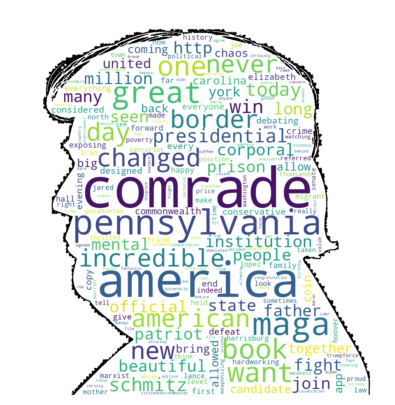

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

stopwords=set(STOPWORDS)

# 워드클라우드 생성
wordcloud = WordCloud(
    stopwords=stopwords,
    width=800,
    height=400,
    contour_width=2,
    background_color='white',
    mask=trump_mask
).generate_from_frequencies(tt['frequency'])

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

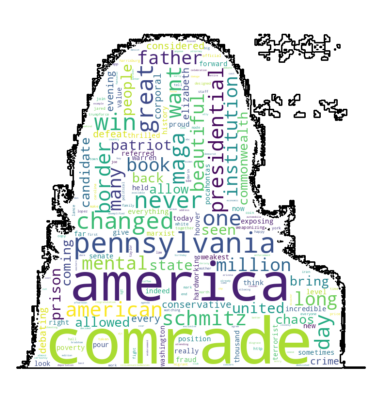

In [90]:
stopwords=set(STOPWORDS)

# 워드클라우드 생성
wordcloud = WordCloud(
    stopwords=stopwords,
    width=800,
    height=400,
    contour_width=2,
    background_color='white',
    mask=harris_mask
).generate_from_frequencies(ht['frequency'])

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TF-IDF 워드클라우드

In [93]:
def TF_IDF(corpus):
    tfidfv = TfidfVectorizer(min_df=0.2).fit(corpus)
    return tfidfv

trump_tfidf=TF_IDF(tt_text)
harris_tfidf=TF_IDF(ht_text)

trump_TFIDF_matrix = trump_tfidf.transform(tt_text).toarray()
harris_TFIDF_matrix = harris_tfidf.transform(ht_text).toarray()

trump_word_index = {idx:word for (word,idx) in trump_tfidf.vocabulary_.items()}
harris_word_index = {idx:word for (word,idx) in harris_tfidf.vocabulary_.items()}


trump_TFIDF_sum = trump_TFIDF_matrix.sum(axis=0)
harris_TFIDF_sum = harris_TFIDF_matrix.sum(axis=0)

trump_TFIDF_frequencies = {trump_word_index[i]:trump_TFIDF_sum[i] for i in range(len(trump_tfidf.vocabulary_))}
harris_TFIDF_frequencies = {harris_word_index[i]:harris_TFIDF_sum[i] for i in range(len(harris_tfidf.vocabulary_))}

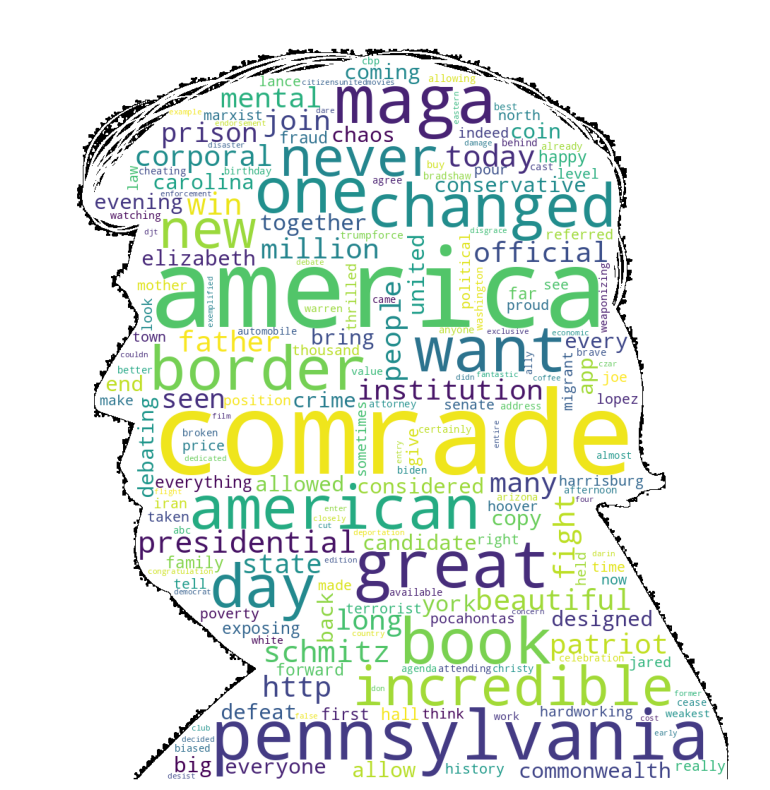

In [106]:
trump_wordcloud = WordCloud(relative_scaling = 0.2,
                     background_color='white',
                    width=800,
                    height=400,
                    mask=trump_mask,
                    contour_color='black',
                    contour_width=1
                     ).generate_from_frequencies(trump_TFIDF_frequencies)
plt.figure(figsize=(15,10))
plt.imshow(trump_wordcloud)
plt.axis("off")
plt.show()

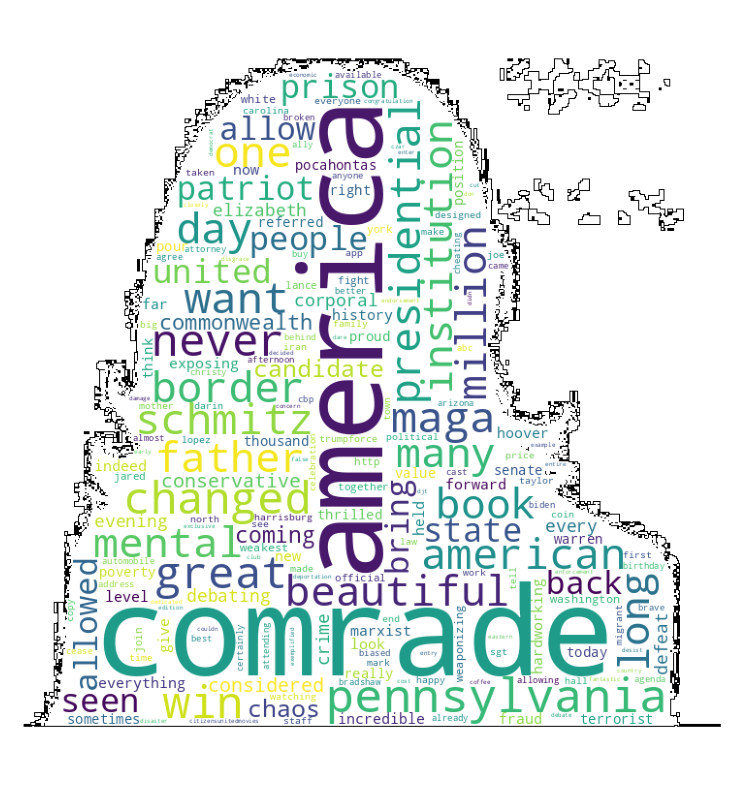

In [104]:
harris_wordcloud = WordCloud(relative_scaling = 0.2,
                     background_color='white',
                    width=800,
                    height=400,
                    mask=harris_mask,
                    contour_color='black',
                    contour_width=1
                     ).generate_from_frequencies(harris_TFIDF_frequencies)
plt.figure(figsize=(15,10))
plt.imshow(harris_wordcloud)
plt.axis("off")
plt.show()